In [137]:
# Import Necessary Libraries
import pandas as pd
import numpy as ny
import statistics
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from mlxtend.frequent_patterns import apriori, association_rules

# Load in Marquette Dataset-- G.L for Game Log
gl = pd.read_csv('marquette.csv')
gl.head()
# clean dataset: don't need unnamed 2 column or unnamed 23 column (mostly or all NaN)
print(gl.columns)
gl = gl.drop("Unnamed: 2", axis='columns')
gl = gl.drop("Unnamed: 23", axis='columns')
gl.head()
# change column names
gl.rename(columns={'Unnamed: 0':'GameID','Unnamed: 1':'Date','Unnamed: 3':'Opp','Unnamed: 4':'W/L','Unnamed: 5':'Points Scored','Unnamed: 6':'Opp Points'},inplace=True)
gl.rename(columns={'School':'MU_FGM','School.1':'MU_FGA','School.2':'MU_FG_PCT','School.3':'MU_3PM','School.4':'MU_3PA','School.5':'MU_3PCT','School.6':'MU_FTM','School.7':'MU_FTA','School.8':'MU_FT_PCT',
                   'School.9':'MU_OFF_RB','School.10':'MU_TRB','School.11':'MU_AST','School.12':'MU_STL','School.13':'MU_BLK','School.14':'MU_TOV','School.15':'MU_PF'},inplace=True)
gl.rename(columns={'Opponent':'Opp_FGM','Opponent.1':'Opp_FGA','Opponent.2':'Opp_FG_PCT','Opponent.3':'Opp_3PM','Opponent.4':'Opp_3PA','Opponent.5':'Opp_3PCT','Opponent.6':'Opp_FTM','Opponent.7':'Opp_FTA','Opponent.8':'Opp_FT_PCT',
                   'Opponent.9':'Opp_OFF_RB','Opponent.10':'Opp_TRB','Opponent.11':'Opp_AST','Opponent.12':'Opp_STL','Opponent.13':'Opp_BLK','Opponent.14':'Opp_TOV','Opponent.15':'Opp_PF'},inplace=True)
print(gl.columns)
# delete top row
gl = gl.iloc[1:]
gl.head(7)



Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'School', 'School.1', 'School.2',
       'School.3', 'School.4', 'School.5', 'School.6', 'School.7', 'School.8',
       'School.9', 'School.10', 'School.11', 'School.12', 'School.13',
       'School.14', 'School.15', 'Unnamed: 23', 'Opponent', 'Opponent.1',
       'Opponent.2', 'Opponent.3', 'Opponent.4', 'Opponent.5', 'Opponent.6',
       'Opponent.7', 'Opponent.8', 'Opponent.9', 'Opponent.10', 'Opponent.11',
       'Opponent.12', 'Opponent.13', 'Opponent.14', 'Opponent.15'],
      dtype='object')
Index(['GameID', 'Date', 'Opp', 'W/L', 'Points Scored', 'Opp Points', 'MU_FGM',
       'MU_FGA', 'MU_FG_PCT', 'MU_3PM', 'MU_3PA', 'MU_3PCT', 'MU_FTM',
       'MU_FTA', 'MU_FT_PCT', 'MU_OFF_RB', 'MU_TRB', 'MU_AST', 'MU_STL',
       'MU_BLK', 'MU_TOV', 'MU_PF', 'Opp_FGM', 'Opp_FGA', 'Opp_FG_PCT',
       'Opp_3PM', 'Opp_3PA', 'Opp_3PCT', 'Opp_FTM', 'Opp_FTA', 'Opp_FT_PCT',
       'Opp

,GameID,Date,Opp,W/L,Points Scored,Opp Points,MU_FGM,MU_FGA,MU_FG_PCT,MU_3PM,...,Opp_FTM,Opp_FTA,Opp_FT_PCT,Opp_OFF_RB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF
1,1,2023-11-06,Northern Illinois,W,92,70,35,67,.522,9,...,11,16,.688,16,38,10,6,4,14,13
2,2,2023-11-10,Rider,W,95,65,34,62,.548,13,...,8,15,.533,13,36,14,6,1,16,17
3,3,2023-11-14,Illinois,W,71,64,27,62,.435,5,...,11,13,.846,11,37,8,6,7,15,15
4,4,2023-11-20,UCLA,W,71,69,25,55,.455,11,...,18,20,.900,4,27,10,5,3,12,19
5,5,2023-11-21,Kansas,W,73,59,29,64,.453,6,...,9,16,.563,7,29,17,7,2,18,12
6,6,2023-11-22,Purdue,L,75,78,30,58,.517,5,...,8,15,.533,10,32,14,3,2,14,11
7,7,2023-11-28,Southern,W,93,56,32,65,.492,10,...,3,9,.333,4,29,13,5,5,18,16


In [138]:
# check for any remaining null values-- all good
gl.info()
gl.describe()
gl.get('W/L').unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 1 to 37
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GameID         37 non-null     object
 1   Date           37 non-null     object
 2   Opp            37 non-null     object
 3   W/L            37 non-null     object
 4   Points Scored  37 non-null     object
 5   Opp Points     37 non-null     object
 6   MU_FGM         37 non-null     object
 7   MU_FGA         37 non-null     object
 8   MU_FG_PCT      37 non-null     object
 9   MU_3PM         37 non-null     object
 10  MU_3PA         37 non-null     object
 11  MU_3PCT        37 non-null     object
 12  MU_FTM         37 non-null     object
 13  MU_FTA         37 non-null     object
 14  MU_FT_PCT      37 non-null     object
 15  MU_OFF_RB      37 non-null     object
 16  MU_TRB         37 non-null     object
 17  MU_AST         37 non-null     object
 18  MU_STL         37 non-null     o

array(['W', 'L', 'W (1 OT)'], dtype=object)

In [139]:
# change all columns except date, opp, and w/l to numerics
numerics = gl.columns.drop({'Date','Opp','W/L'})
gl[numerics] = gl[numerics].apply(pd.to_numeric)
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 1 to 37
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GameID         37 non-null     int64  
 1   Date           37 non-null     object 
 2   Opp            37 non-null     object 
 3   W/L            37 non-null     object 
 4   Points Scored  37 non-null     int64  
 5   Opp Points     37 non-null     int64  
 6   MU_FGM         37 non-null     int64  
 7   MU_FGA         37 non-null     int64  
 8   MU_FG_PCT      37 non-null     float64
 9   MU_3PM         37 non-null     int64  
 10  MU_3PA         37 non-null     int64  
 11  MU_3PCT        37 non-null     float64
 12  MU_FTM         37 non-null     int64  
 13  MU_FTA         37 non-null     int64  
 14  MU_FT_PCT      37 non-null     float64
 15  MU_OFF_RB      37 non-null     int64  
 16  MU_TRB         37 non-null     int64  
 17  MU_AST         37 non-null     int64  
 18  MU_STL      

In [140]:
# replace W and L with 0 and 1
gl['W/L'] = gl.get('W/L').replace('L',1)
gl['W/L'] = gl.get('W/L').replace('W',0)
gl['W/L'] = gl.get('W/L').replace('W (1 OT)',0)
gl.get('W/L').unique()
gl.head(7)


/var/folders/f1/zmrfz5j54rd04d5dxc07w4_h0000gn/T/ipykernel_95625/948829505.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gl['W/L'] = gl.get('W/L').replace('W (1 OT)',0)


,GameID,Date,Opp,W/L,Points Scored,Opp Points,MU_FGM,MU_FGA,MU_FG_PCT,MU_3PM,...,Opp_FTM,Opp_FTA,Opp_FT_PCT,Opp_OFF_RB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF
1,1,2023-11-06,Northern Illinois,0,92,70,35,67,0.522,9,...,11,16,0.688,16,38,10,6,4,14,13
2,2,2023-11-10,Rider,0,95,65,34,62,0.548,13,...,8,15,0.533,13,36,14,6,1,16,17
3,3,2023-11-14,Illinois,0,71,64,27,62,0.435,5,...,11,13,0.846,11,37,8,6,7,15,15
4,4,2023-11-20,UCLA,0,71,69,25,55,0.455,11,...,18,20,0.900,4,27,10,5,3,12,19
5,5,2023-11-21,Kansas,0,73,59,29,64,0.453,6,...,9,16,0.563,7,29,17,7,2,18,12
6,6,2023-11-22,Purdue,1,75,78,30,58,0.517,5,...,8,15,0.533,10,32,14,3,2,14,11
7,7,2023-11-28,Southern,0,93,56,32,65,0.492,10,...,3,9,0.333,4,29,13,5,5,18,16


In [141]:
# I want to examine visual representations of the data, marquette and opponents stats on different graphs
# color code by marquette win or loss
mu_wins = gl.where(gl['W/L']==0)
mu_wins.dropna(inplace=True)
mu_wins.head(7)


,GameID,Date,Opp,W/L,Points Scored,Opp Points,MU_FGM,MU_FGA,MU_FG_PCT,MU_3PM,...,Opp_FTM,Opp_FTA,Opp_FT_PCT,Opp_OFF_RB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF
1,1.0,2023-11-06,Northern Illinois,0.0,92.0,70.0,35.0,67.0,0.522,9.0,...,11.0,16.0,0.688,16.0,38.0,10.0,6.0,4.0,14.0,13.0
2,2.0,2023-11-10,Rider,0.0,95.0,65.0,34.0,62.0,0.548,13.0,...,8.0,15.0,0.533,13.0,36.0,14.0,6.0,1.0,16.0,17.0
3,3.0,2023-11-14,Illinois,0.0,71.0,64.0,27.0,62.0,0.435,5.0,...,11.0,13.0,0.846,11.0,37.0,8.0,6.0,7.0,15.0,15.0
4,4.0,2023-11-20,UCLA,0.0,71.0,69.0,25.0,55.0,0.455,11.0,...,18.0,20.0,0.900,4.0,27.0,10.0,5.0,3.0,12.0,19.0
5,5.0,2023-11-21,Kansas,0.0,73.0,59.0,29.0,64.0,0.453,6.0,...,9.0,16.0,0.563,7.0,29.0,17.0,7.0,2.0,18.0,12.0
7,7.0,2023-11-28,Southern,0.0,93.0,56.0,32.0,65.0,0.492,10.0,...,3.0,9.0,0.333,4.0,29.0,13.0,5.0,5.0,18.0,16.0
9,9.0,2023-12-06,Texas,0.0,86.0,65.0,30.0,59.0,0.508,14.0,...,11.0,14.0,0.786,6.0,27.0,16.0,10.0,5.0,13.0,15.0


In [142]:
mu_loss = gl.where(gl['W/L']==1)
mu_loss.dropna(inplace=True)
mu_loss.head(7)

,GameID,Date,Opp,W/L,Points Scored,Opp Points,MU_FGM,MU_FGA,MU_FG_PCT,MU_3PM,...,Opp_FTM,Opp_FTA,Opp_FT_PCT,Opp_OFF_RB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF
6,6.0,2023-11-22,Purdue,1.0,75.0,78.0,30.0,58.0,0.517,5.0,...,8.0,15.0,0.533,10.0,32.0,14.0,3.0,2.0,14.0,11.0
8,8.0,2023-12-02,Wisconsin,1.0,64.0,75.0,23.0,55.0,0.418,7.0,...,24.0,28.0,0.857,12.0,33.0,9.0,6.0,1.0,12.0,13.0
12,12.0,2023-12-19,Providence,1.0,57.0,72.0,18.0,56.0,0.321,4.0,...,17.0,28.0,0.607,6.0,36.0,17.0,5.0,1.0,13.0,18.0
15,15.0,2024-01-06,Seton Hall,1.0,75.0,78.0,28.0,65.0,0.431,10.0,...,14.0,16.0,0.875,13.0,42.0,17.0,6.0,5.0,19.0,14.0
16,16.0,2024-01-10,Butler,1.0,62.0,69.0,24.0,73.0,0.329,5.0,...,11.0,15.0,0.733,5.0,38.0,18.0,6.0,2.0,18.0,16.0
25,25.0,2024-02-17,UConn,1.0,53.0,81.0,21.0,57.0,0.368,5.0,...,12.0,14.0,0.857,15.0,39.0,24.0,11.0,4.0,11.0,12.0
29,29.0,2024-03-02,Creighton,1.0,75.0,89.0,30.0,64.0,0.469,9.0,...,10.0,12.0,0.833,6.0,33.0,19.0,5.0,6.0,6.0,10.0


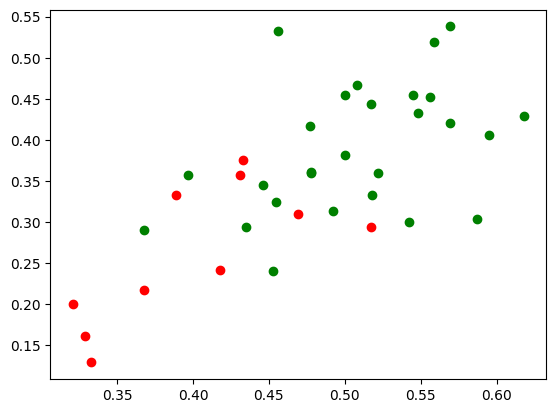

In [143]:
# marquette scoring pcts
plt.scatter(x=mu_wins.get('MU_FG_PCT'),y=mu_wins.get("MU_3PCT"),color='g')
plt.scatter(x=mu_loss.get('MU_FG_PCT'),y=mu_loss.get("MU_3PCT"),color='r')

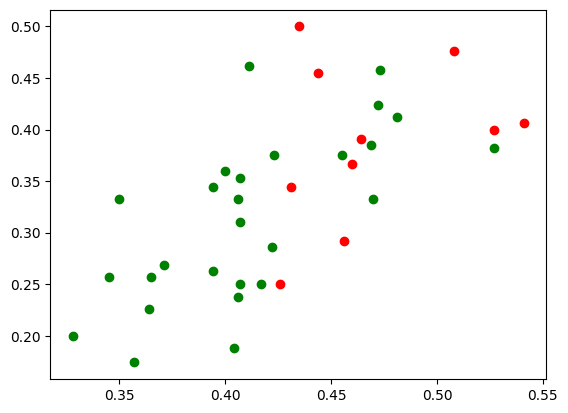

In [144]:
# opp scoring pcts
plt.scatter(x=mu_wins.get('Opp_FG_PCT'),y=mu_wins.get("Opp_3PCT"),color='g')
plt.scatter(x=mu_loss.get('Opp_FG_PCT'),y=mu_loss.get("Opp_3PCT"),color='r')

In [157]:
# Association Rules on winning and losing data
# first, find which data we need

hc = mu_wins.columns.drop({'GameID','Date','Opp','MU_FGA','MU_3PA','MU_FTA','Opp_FGA','Opp_3PA','Opp_FTA'})
mu_wins_hc = mu_wins[hc]
mu_loss_hc = mu_loss[hc]


In [159]:
# break data into variables for hot encoding:
# ours and opps points
gl['Points Scored'].describe()
gl['Opp Points'].describe()
def group_pts(x):
    if x <= 60.00:
        return '50-60'
    elif x <= 80.00:
        return '61-80'
    elif x <= 100:
        return '81-100'
    else:
        return '>100'
mu_wins_hc.loc[:,'Points Scored'] = mu_wins['Points Scored'].apply(group_pts)
mu_wins_hc.loc[:,'Opp Points'] = mu_wins['Opp Points'].apply(group_pts)
mu_loss_hc.loc[:,'Points Scored'] = mu_loss['Points Scored'].apply(group_pts)
mu_loss_hc.loc[:,'Opp Points'] = mu_loss['Opp Points'].apply(group_pts)
mu_wins_hc.head()

,W/L,Points Scored,Opp Points,MU_FGM,MU_FG_PCT,MU_3PM,MU_3PCT,MU_FTM,MU_FT_PCT,MU_OFF_RB,...,Opp_3PCT,Opp_FTM,Opp_FT_PCT,Opp_OFF_RB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF
1,0.0,81-100,61-80,35.0,0.522,9.0,0.360,13.0,0.619,11.0,...,0.269,11.0,0.688,16.0,38.0,10.0,6.0,4.0,14.0,13.0
2,0.0,81-100,61-80,34.0,0.548,13.0,0.433,14.0,0.667,6.0,...,0.263,8.0,0.533,13.0,36.0,14.0,6.0,1.0,16.0,17.0
3,0.0,61-80,61-80,27.0,0.435,5.0,0.294,12.0,0.600,9.0,...,0.333,11.0,0.846,11.0,37.0,8.0,6.0,7.0,15.0,15.0
4,0.0,61-80,61-80,25.0,0.455,11.0,0.324,10.0,0.556,3.0,...,0.385,18.0,0.900,4.0,27.0,10.0,5.0,3.0,12.0,19.0
5,0.0,61-80,50-60,29.0,0.453,6.0,0.240,9.0,0.750,10.0,...,0.353,9.0,0.563,7.0,29.0,17.0,7.0,2.0,18.0,12.0


In [161]:
# ours and opps FGs
gl['MU_FGM'].describe()
gl['Opp_FGM'].describe()
#range: 18-44
def group_pts(x):
    if x <= 20:
       return '<=20'
    elif x <= 30:
        return '21-30'
    elif x <= 40:
        return '31-40'
    else:
        return '>50'
mu_wins_hc.loc[:,'MU_FGM'] = mu_wins['MU_FGM'].apply(group_pts)
mu_wins_hc.loc[:,'Opp_FGM'] = mu_wins['Opp_FGM'].apply(group_pts)
mu_loss_hc.loc[:,'MU_FGM'] = mu_loss['MU_FGM'].apply(group_pts)
mu_loss_hc.loc[:,'Opp_FGM'] = mu_loss['Opp_FGM'].apply(group_pts)
mu_loss_hc.head()

,W/L,Points Scored,Opp Points,MU_FGM,MU_FG_PCT,MU_3PM,MU_3PCT,MU_FTM,MU_FT_PCT,MU_OFF_RB,...,Opp_3PCT,Opp_FTM,Opp_FT_PCT,Opp_OFF_RB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF
6,1.0,61-80,61-80,21-30,0.517,5.0,0.294,10.0,0.909,5.0,...,0.476,8.0,0.533,10.0,32.0,14.0,3.0,2.0,14.0,11.0
8,1.0,61-80,61-80,21-30,0.418,7.0,0.241,11.0,0.786,6.0,...,0.250,24.0,0.857,12.0,33.0,9.0,6.0,1.0,12.0,13.0
12,1.0,50-60,61-80,<=20,0.321,4.0,0.200,17.0,0.810,7.0,...,0.344,17.0,0.607,6.0,36.0,17.0,5.0,1.0,13.0,18.0
15,1.0,61-80,61-80,21-30,0.431,10.0,0.357,9.0,0.692,11.0,...,0.400,14.0,0.875,13.0,42.0,17.0,6.0,5.0,19.0,14.0
16,1.0,61-80,61-80,21-30,0.329,5.0,0.161,9.0,0.818,14.0,...,0.455,11.0,0.733,5.0,38.0,18.0,6.0,2.0,18.0,16.0


In [163]:
# ours and opps PCTs
gl['MU_FG_PCT'].describe()
gl['Opp_FG_PCT'].describe()
gl['MU_3PCT'].describe()
gl['Opp_3PCT'].describe()
gl['MU_FT_PCT'].describe()
gl['Opp_FT_PCT'].describe()
#range: 0.12-0.1
def group_pcts(x):
    if x <= 0.2:
       return '<=0.200'
    elif x <= 0.3:
        return '0.201-0.300'
    elif x <= 0.4:
        return '0.301-0.400'
    elif x <= 0.5:
        return '0.401-0.500'
    elif x <= 0.6:
        return '0.501-0.600'
    elif x <= 0.7:
        return '0.601-0.700'
    elif x <= 0.8:
        return '0.701-0.800'
    elif x <= 0.9:
        return '0.801-0.900'
    else:
        return '>0.900'
mu_wins_hc.loc[:,'MU_FG_PCT'] = mu_wins['MU_FG_PCT'].apply(group_pcts)
mu_wins_hc.loc[:,'Opp_FG_PCT'] = mu_wins['Opp_FG_PCT'].apply(group_pcts)
mu_loss_hc.loc[:,'MU_FG_PCT'] = mu_loss['MU_FG_PCT'].apply(group_pcts)
mu_loss_hc.loc[:,'Opp_FG_PCT'] = mu_loss['Opp_FG_PCT'].apply(group_pcts)
mu_wins_hc.loc[:,'MU_3PCT'] = mu_wins['MU_3PCT'].apply(group_pcts)
mu_wins_hc.loc[:,'Opp_3PCT'] = mu_wins['Opp_3PCT'].apply(group_pcts)
mu_loss_hc.loc[:,'MU_3PCT'] = mu_loss['MU_3PCT'].apply(group_pcts)
mu_loss_hc.loc[:,'Opp_3PCT'] = mu_loss['Opp_3PCT'].apply(group_pcts)
mu_wins_hc.loc[:,'MU_FT_PCT'] = mu_wins['MU_FT_PCT'].apply(group_pcts)
mu_wins_hc.loc[:,'Opp_FT_PCT'] = mu_wins['Opp_FT_PCT'].apply(group_pcts)
mu_loss_hc.loc[:,'MU_FT_PCT'] = mu_loss['MU_FT_PCT'].apply(group_pcts)
mu_loss_hc.loc[:,'Opp_FT_PCT'] = mu_loss['Opp_FT_PCT'].apply(group_pcts)

mu_wins_hc.head()


,W/L,Points Scored,Opp Points,MU_FGM,MU_FG_PCT,MU_3PM,MU_3PCT,MU_FTM,MU_FT_PCT,MU_OFF_RB,...,Opp_3PCT,Opp_FTM,Opp_FT_PCT,Opp_OFF_RB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF
1,0.0,81-100,61-80,31-40,0.501-0.600,9.0,0.301-0.400,13.0,0.601-0.700,11.0,...,0.201-0.300,11.0,0.601-0.700,16.0,38.0,10.0,6.0,4.0,14.0,13.0
2,0.0,81-100,61-80,31-40,0.501-0.600,13.0,0.401-0.500,14.0,0.601-0.700,6.0,...,0.201-0.300,8.0,0.501-0.600,13.0,36.0,14.0,6.0,1.0,16.0,17.0
3,0.0,61-80,61-80,21-30,0.401-0.500,5.0,0.201-0.300,12.0,0.501-0.600,9.0,...,0.301-0.400,11.0,0.801-0.900,11.0,37.0,8.0,6.0,7.0,15.0,15.0
4,0.0,61-80,61-80,21-30,0.401-0.500,11.0,0.301-0.400,10.0,0.501-0.600,3.0,...,0.301-0.400,18.0,0.801-0.900,4.0,27.0,10.0,5.0,3.0,12.0,19.0
5,0.0,61-80,50-60,21-30,0.401-0.500,6.0,0.201-0.300,9.0,0.701-0.800,10.0,...,0.301-0.400,9.0,0.501-0.600,7.0,29.0,17.0,7.0,2.0,18.0,12.0


In [165]:
# ours and opps smaller pts (3s, FTs, OFF RBs, ASTs, BLKs)
#range: 0-24
def group_small_pts(x):
    if x <= 5:
       return '<=5'
    elif x <= 10:
        return '6-10'
    elif x <= 15:
        return '11-15'
    elif x <= 20:
        return '16-20'
    else:
        return '>20'

mu_wins_hc.loc[:,'MU_3PM'] = mu_wins['MU_3PM'].apply(group_small_pts)
mu_wins_hc.loc[:,'Opp_3PM'] = mu_wins['Opp_3PM'].apply(group_small_pts)
mu_loss_hc.loc[:,'MU_3PM'] = mu_loss['MU_3PM'].apply(group_small_pts)
mu_loss_hc.loc[:,'Opp_3PM'] = mu_loss['Opp_3PM'].apply(group_small_pts)

mu_wins_hc.loc[:,'MU_FTM'] = mu_wins['MU_FTM'].apply(group_small_pts)
mu_wins_hc.loc[:,'Opp_FTM'] = mu_wins['Opp_FTM'].apply(group_small_pts)
mu_loss_hc.loc[:,'MU_FTM'] = mu_loss['MU_FTM'].apply(group_small_pts)
mu_loss_hc.loc[:,'Opp_FTM'] = mu_loss['Opp_FTM'].apply(group_small_pts)

mu_wins_hc.loc[:,'MU_OFF_RB'] = mu_wins['MU_OFF_RB'].apply(group_small_pts)
mu_wins_hc.loc[:,'Opp_OFF_RB'] = mu_wins['Opp_OFF_RB'].apply(group_small_pts)
mu_loss_hc.loc[:,'MU_OFF_RB'] = mu_loss['MU_OFF_RB'].apply(group_small_pts)
mu_loss_hc.loc[:,'Opp_OFF_RB'] = mu_loss['Opp_OFF_RB'].apply(group_small_pts)

mu_wins_hc.loc[:,'MU_AST'] = mu_wins['MU_AST'].apply(group_small_pts)
mu_wins_hc.loc[:,'Opp_AST'] = mu_wins['Opp_AST'].apply(group_small_pts)
mu_loss_hc.loc[:,'MU_AST'] = mu_loss['MU_AST'].apply(group_small_pts)
mu_loss_hc.loc[:,'Opp_AST'] = mu_loss['Opp_AST'].apply(group_small_pts)

mu_wins_hc.loc[:,'MU_STL'] = mu_wins['MU_STL'].apply(group_small_pts)
mu_wins_hc.loc[:,'Opp_STL'] = mu_wins['Opp_STL'].apply(group_small_pts)
mu_loss_hc.loc[:,'MU_STL'] = mu_loss['MU_STL'].apply(group_small_pts)
mu_loss_hc.loc[:,'Opp_STL'] = mu_loss['Opp_STL'].apply(group_small_pts)

mu_wins_hc.loc[:,'MU_BLK'] = mu_wins['MU_BLK'].apply(group_small_pts)
mu_wins_hc.loc[:,'Opp_BLK'] = mu_wins['Opp_BLK'].apply(group_small_pts)
mu_loss_hc.loc[:,'MU_BLK'] = mu_loss['MU_BLK'].apply(group_small_pts)
mu_loss_hc.loc[:,'Opp_BLK'] = mu_loss['Opp_BLK'].apply(group_small_pts)

mu_wins_hc.loc[:,'MU_TOV'] = mu_wins['MU_TOV'].apply(group_small_pts)
mu_wins_hc.loc[:,'Opp_TOV'] = mu_wins['Opp_TOV'].apply(group_small_pts)
mu_loss_hc.loc[:,'MU_TOV'] = mu_loss['MU_TOV'].apply(group_small_pts)
mu_loss_hc.loc[:,'Opp_TOV'] = mu_loss['Opp_TOV'].apply(group_small_pts)

mu_wins_hc.loc[:,'MU_PF'] = mu_wins['MU_PF'].apply(group_small_pts)
mu_wins_hc.loc[:,'Opp_PF'] = mu_wins['Opp_PF'].apply(group_small_pts)
mu_loss_hc.loc[:,'MU_PF'] = mu_loss['MU_PF'].apply(group_small_pts)
mu_loss_hc.loc[:,'Opp_PF'] = mu_loss['Opp_PF'].apply(group_small_pts)


mu_loss_hc.head()

,W/L,Points Scored,Opp Points,MU_FGM,MU_FG_PCT,MU_3PM,MU_3PCT,MU_FTM,MU_FT_PCT,MU_OFF_RB,...,Opp_3PCT,Opp_FTM,Opp_FT_PCT,Opp_OFF_RB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF
6,1.0,61-80,61-80,21-30,0.501-0.600,<=5,0.201-0.300,6-10,>0.900,<=5,...,0.401-0.500,6-10,0.501-0.600,6-10,32.0,11-15,<=5,<=5,11-15,11-15
8,1.0,61-80,61-80,21-30,0.401-0.500,6-10,0.201-0.300,11-15,0.701-0.800,6-10,...,0.201-0.300,>20,0.801-0.900,11-15,33.0,6-10,6-10,<=5,11-15,11-15
12,1.0,50-60,61-80,<=20,0.301-0.400,<=5,<=0.200,16-20,0.801-0.900,6-10,...,0.301-0.400,16-20,0.601-0.700,6-10,36.0,16-20,<=5,<=5,11-15,16-20
15,1.0,61-80,61-80,21-30,0.401-0.500,6-10,0.301-0.400,6-10,0.601-0.700,11-15,...,0.301-0.400,11-15,0.801-0.900,11-15,42.0,16-20,6-10,<=5,16-20,11-15
16,1.0,61-80,61-80,21-30,0.301-0.400,<=5,<=0.200,6-10,0.801-0.900,11-15,...,0.401-0.500,11-15,0.701-0.800,<=5,38.0,16-20,6-10,<=5,16-20,16-20


In [167]:
# separate function for total RBs
gl['MU_TRB'].describe()
gl['Opp_TRB'].describe()
# range: 18-43
def group_trbs(x):
    if x <= 20:
       return '<=20'
    elif x <= 30:
        return '21-30'
    elif x <= 40:
        return '31-40'
    else:
        return '>40'
    
mu_wins_hc.loc[:,'MU_TRB'] = mu_wins['MU_TRB'].apply(group_trbs)
mu_wins_hc.loc[:,'Opp_TRB'] = mu_wins['Opp_TRB'].apply(group_trbs)
mu_loss_hc.loc[:,'MU_TRB'] = mu_loss['MU_TRB'].apply(group_trbs)
mu_loss_hc.loc[:,'Opp_TRB'] = mu_loss['Opp_TRB'].apply(group_trbs)

mu_wins_hc.head()


,W/L,Points Scored,Opp Points,MU_FGM,MU_FG_PCT,MU_3PM,MU_3PCT,MU_FTM,MU_FT_PCT,MU_OFF_RB,...,Opp_3PCT,Opp_FTM,Opp_FT_PCT,Opp_OFF_RB,Opp_TRB,Opp_AST,Opp_STL,Opp_BLK,Opp_TOV,Opp_PF
1,0.0,81-100,61-80,31-40,0.501-0.600,6-10,0.301-0.400,11-15,0.601-0.700,11-15,...,0.201-0.300,11-15,0.601-0.700,16-20,31-40,6-10,6-10,<=5,11-15,11-15
2,0.0,81-100,61-80,31-40,0.501-0.600,11-15,0.401-0.500,11-15,0.601-0.700,6-10,...,0.201-0.300,6-10,0.501-0.600,11-15,31-40,11-15,6-10,<=5,16-20,16-20
3,0.0,61-80,61-80,21-30,0.401-0.500,<=5,0.201-0.300,11-15,0.501-0.600,6-10,...,0.301-0.400,11-15,0.801-0.900,11-15,31-40,6-10,6-10,6-10,11-15,11-15
4,0.0,61-80,61-80,21-30,0.401-0.500,11-15,0.301-0.400,6-10,0.501-0.600,<=5,...,0.301-0.400,16-20,0.801-0.900,<=5,21-30,6-10,<=5,<=5,11-15,16-20
5,0.0,61-80,50-60,21-30,0.401-0.500,6-10,0.201-0.300,6-10,0.701-0.800,6-10,...,0.301-0.400,6-10,0.501-0.600,6-10,21-30,16-20,6-10,<=5,16-20,11-15


In [169]:
wins_dummies = pd.get_dummies(mu_wins_hc)
wins_dummies.head()
loss_dummies = pd.get_dummies(mu_loss_hc)
loss_dummies.head()

,W/L,Points Scored_50-60,Points Scored_61-80,Opp Points_61-80,Opp Points_81-100,MU_FGM_21-30,MU_FGM_<=20,MU_FG_PCT_0.301-0.400,MU_FG_PCT_0.401-0.500,MU_FG_PCT_0.501-0.600,...,Opp_STL_6-10,Opp_STL_<=5,Opp_BLK_6-10,Opp_BLK_<=5,Opp_TOV_11-15,Opp_TOV_16-20,Opp_TOV_6-10,Opp_PF_11-15,Opp_PF_16-20,Opp_PF_6-10
6,1.0,False,True,True,False,True,False,False,False,True,...,False,True,False,True,True,False,False,True,False,False
8,1.0,False,True,True,False,True,False,False,True,False,...,True,False,False,True,True,False,False,True,False,False
12,1.0,True,False,True,False,False,True,True,False,False,...,False,True,False,True,True,False,False,False,True,False
15,1.0,False,True,True,False,True,False,False,True,False,...,True,False,False,True,False,True,False,True,False,False
16,1.0,False,True,True,False,True,False,True,False,False,...,True,False,False,True,False,True,False,False,True,False


In [185]:
# hot encoding complete, apply association rules

wins_apriori = apriori(wins_dummies,min_support=0.5,use_colnames=True,verbose=1)
#num_itemsets = 54
loss_apriori = apriori(loss_dummies,min_support=0.5,use_colnames=True,verbose=1)
#num_itemsets = 76




Processing 10 combinations | Sampling itemset size 54
Processing 518 combinations | Sampling itemset size 76


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [187]:
# support and confidence numbers can probably be optimized, wins_assoc has 258 rows
wins_assoc = association_rules(wins_apriori, num_itemsets=54, metric="confidence",min_threshold=0.5)
wins_assoc =wins_assoc.sort_values(['lift'], ascending=False)
wins_assoc.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
191,"(MU_STL_6-10, Opp Points_61-80, MU_BLK_<=5)",(Opp_TOV_11-15),0.555556,0.629630,0.518519,0.933333,1.482353,1.0,0.168724,5.555556,0.732143,0.777778,0.820000,0.878431
198,(Opp_TOV_11-15),"(MU_STL_6-10, Opp Points_61-80, MU_BLK_<=5)",0.629630,0.555556,0.518519,0.823529,1.482353,1.0,0.168724,2.518519,0.878571,0.777778,0.602941,0.878431
81,(Opp_TOV_11-15),"(MU_STL_6-10, Opp Points_61-80)",0.629630,0.629630,0.555556,0.882353,1.401384,1.0,0.159122,3.148148,0.773333,0.789474,0.682353,0.882353
80,"(MU_STL_6-10, Opp Points_61-80)",(Opp_TOV_11-15),0.629630,0.629630,0.555556,0.882353,1.401384,1.0,0.159122,3.148148,0.773333,0.789474,0.682353,0.882353
132,"(MU_STL_6-10, MU_BLK_<=5)",(Opp_TOV_11-15),0.629630,0.629630,0.555556,0.882353,1.401384,1.0,0.159122,3.148148,0.773333,0.789474,0.682353,0.882353
137,(Opp_TOV_11-15),"(MU_STL_6-10, MU_BLK_<=5)",0.629630,0.629630,0.555556,0.882353,1.401384,1.0,0.159122,3.148148,0.773333,0.789474,0.682353,0.882353
257,(Opp_TOV_11-15),"(MU_STL_6-10, Opp_BLK_<=5, MU_BLK_<=5)",0.629630,0.592593,0.518519,0.823529,1.389706,1.0,0.145405,2.308642,0.757143,0.736842,0.566845,0.849265
249,"(MU_STL_6-10, MU_BLK_<=5)","(Opp_TOV_11-15, Opp_BLK_<=5)",0.629630,0.592593,0.518519,0.823529,1.389706,1.0,0.145405,2.308642,0.757143,0.736842,0.566845,0.849265
192,"(Opp_TOV_11-15, Opp Points_61-80)","(MU_STL_6-10, MU_BLK_<=5)",0.592593,0.629630,0.518519,0.875000,1.389706,1.0,0.145405,2.962963,0.688312,0.736842,0.662500,0.849265
194,"(Opp_TOV_11-15, MU_BLK_<=5)","(MU_STL_6-10, Opp Points_61-80)",0.592593,0.629630,0.518519,0.875000,1.389706,1.0,0.145405,2.962963,0.688312,0.736842,0.662500,0.849265


In [191]:
# again, 8622 rows, can definitely be optimized
loss_assoc = association_rules(loss_apriori, num_itemsets=76, metric="confidence",min_threshold=0.5)
loss_assoc =loss_assoc.sort_values(['lift'], ascending=False)
loss_assoc.head(10)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
6324,"(Opp_FG_PCT_0.401-0.500, W/L, Opp_FGM_21-30, M...",(MU_STL_6-10),0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
7810,(Opp_3PM_6-10),"(MU_TOV_6-10, Opp_BLK_<=5, Opp Points_61-80, O...",0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
7490,"(Opp Points_61-80, MU_FTM_6-10)","(W/L, MU_TOV_6-10, Opp_FGM_21-30, MU_FGM_21-30)",0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
6347,"(W/L, MU_STL_6-10)","(Opp_FG_PCT_0.401-0.500, Opp_FGM_21-30, MU_AST...",0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
7772,"(W/L, Opp_FGM_21-30, Opp Points_61-80, Opp_3PM...","(MU_TOV_6-10, Opp_BLK_<=5)",0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
6345,"(MU_STL_6-10, Opp_FG_PCT_0.401-0.500)","(W/L, Opp_FGM_21-30, MU_AST_6-10)",0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
6344,"(Opp_FG_PCT_0.401-0.500, MU_AST_6-10)","(W/L, MU_STL_6-10, Opp_FGM_21-30)",0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
7774,"(MU_TOV_6-10, Opp Points_61-80, Opp_BLK_<=5)","(W/L, Opp_FGM_21-30, Opp_3PM_6-10)",0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
6342,"(MU_STL_6-10, Opp_FGM_21-30)","(W/L, Opp_FG_PCT_0.401-0.500, MU_AST_6-10)",0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
6341,"(Opp_FGM_21-30, MU_AST_6-10)","(W/L, MU_STL_6-10, Opp_FG_PCT_0.401-0.500)",0.5,0.5,0.5,1.0,2.0,1.0,0.25,inf,1.0,1.0,1.0,1.0
